# Overlay analysis

In [1]:
import geopandas as gpd

In [2]:
grid = gpd.read_file(
    '../data/agis/data/helsinki_region_travel_times_to_railway_station/helsinki_region_travel_times_to_railway_station.gpkg'
)

In [3]:
helsinki = gpd.read_file(
    '../data/agis/data/helsinki_municipality/helsinki_municipality.gpkg'
)

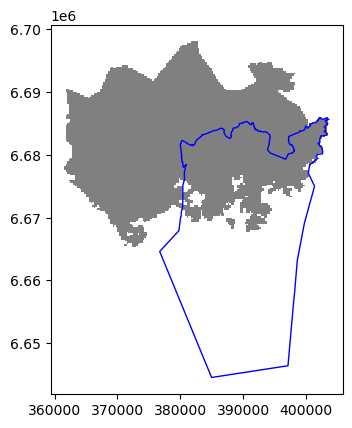

In [5]:
ax = grid.plot(fc='grey')
helsinki.plot(ax=ax, fc='none', ec='b');

In [6]:
grid.columns

Index(['car_m_d', 'car_m_t', 'car_r_d', 'car_r_t', 'from_id', 'pt_m_d',
       'pt_m_t', 'pt_m_tt', 'pt_r_d', 'pt_r_t', 'pt_r_tt', 'to_id', 'walk_d',
       'walk_t', 'geometry'],
      dtype='object')

In [7]:
grid.crs == helsinki.crs

True

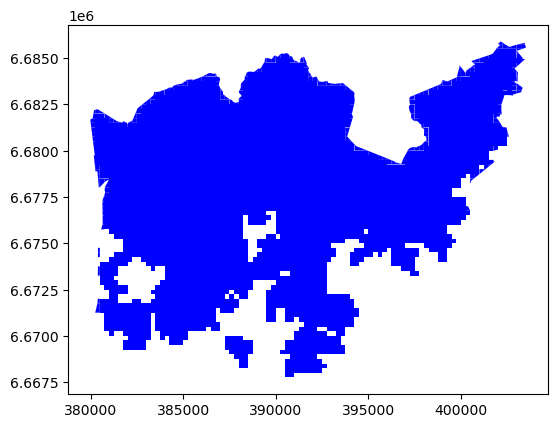

In [9]:
intersection = grid.overlay(helsinki, how='intersection')
intersection.plot(color='b');

In [10]:
intersection.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   car_m_d   3826 non-null   int64   
 1   car_m_t   3826 non-null   int64   
 2   car_r_d   3826 non-null   int64   
 3   car_r_t   3826 non-null   int64   
 4   from_id   3826 non-null   int64   
 5   pt_m_d    3826 non-null   int64   
 6   pt_m_t    3826 non-null   int64   
 7   pt_m_tt   3826 non-null   int64   
 8   pt_r_d    3826 non-null   int64   
 9   pt_r_t    3826 non-null   int64   
 10  pt_r_tt   3826 non-null   int64   
 11  to_id     3826 non-null   int64   
 12  walk_d    3826 non-null   int64   
 13  walk_t    3826 non-null   int64   
 14  GML_ID    3826 non-null   int64   
 15  NAMEFIN   3826 non-null   object  
 16  NAMESWE   3826 non-null   object  
 17  NATCODE   3826 non-null   object  
 18  geometry  3826 non-null   geometry
dtypes: geometry(1), int64(15), object(3)
mem

In [11]:
intersection.to_file('../data/local/intersection.gpkg', 
                    layer='travel_time_matrix_helsinki_region')

In [12]:
import fiona

In [13]:
fiona.listlayers('../data/local/addresses.gpkg')

['addresses', 'addresses_with_population_data']

# Aggregating data

Aggregate travel time data by car travel times, ie. merge grid cells with same travel time to the railway  station.

In [15]:
intersection.car_r_t.describe()

count    3826.000000
mean       27.709357
std         8.781960
min        -1.000000
25%        22.000000
50%        28.000000
75%        34.000000
max        56.000000
Name: car_r_t, dtype: float64

In [17]:
intersection = intersection[intersection.car_r_t > 0]

In [18]:
intersection.car_r_t.describe()

count    3813.000000
mean       27.806976
std         8.635986
min         7.000000
25%        22.000000
50%        28.000000
75%        34.000000
max        56.000000
Name: car_r_t, dtype: float64

In [19]:
dissolved = intersection.dissolve(by='car_r_t')
dissolved.head()

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
car_r_t,,,,,,,,,,,,,,,,,,
7,"POLYGON ((386250 6671750, 386000 6671750, 3857...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
8,"MULTIPOLYGON (((386000 6671500, 385750 6671500...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
9,"MULTIPOLYGON (((385000 6671250, 385000 6671500...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091
10,"MULTIPOLYGON (((385250 6670750, 385250 6671000...",2621,9,2621,5965418,2023,12,13,2033,12,13,5975375,2027,29,27517366,Helsinki,Helsingfors,091
11,"MULTIPOLYGON (((384500 6672000, 384750 6672000...",3540,11,3540,5960106,2925,16,17,2915,16,17,5975375,2975,42,27517366,Helsinki,Helsingfors,091


In [20]:
print(f"Rows in original intersection GeoDataFrame: {len(intersection)}")
print(f"Rows in dissolved layer: {len(dissolved)}")

Rows in original intersection GeoDataFrame: 3813
Rows in dissolved layer: 49


In [21]:
dissolved.index

Index([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56],
      dtype='int64', name='car_r_t')

>The index is the dissolved column.
>
>Select those that are exactly 15mins away

In [22]:
dissolved.loc[15]

geometry    MULTIPOLYGON (((384000.00013620744 6670750.000...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
pt_m_d                                                   6858
pt_m_t                                                     26
pt_m_tt                                                    30
pt_r_d                                                   6858
pt_r_t                                                     27
pt_r_tt                                                    32
to_id                                                 5975375
walk_d                                                   6757
walk_t                                                     97
GML_ID                                               27517366
NAMEFIN                                              Helsinki
NAMESWE 

In [23]:
type(dissolved.loc[15])

pandas.core.series.Series

In [24]:
selection = gpd.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)

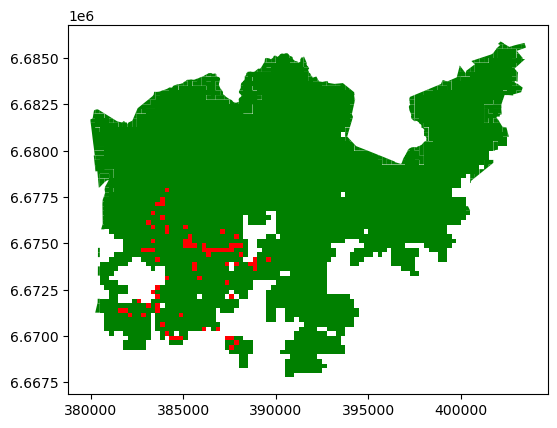

In [25]:
ax = dissolved.plot(fc='g')
selection.plot(ax=ax, fc='r');

In [26]:
import contextily as ctx

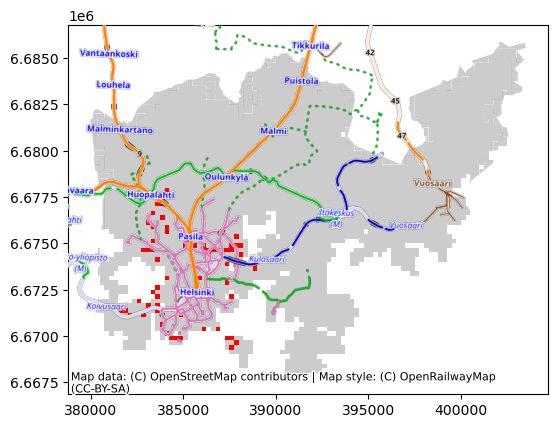

In [29]:
ax = dissolved.plot(fc='grey', alpha=0.4)
selection.plot(ax=ax, fc='r')
ctx.add_basemap(ax, crs=selection.crs, source=ctx.providers.OpenRailwayMap);

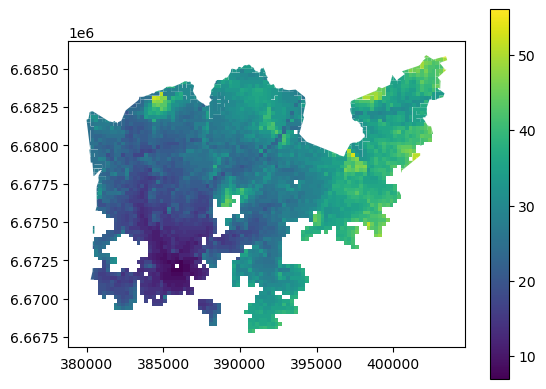

In [31]:
dissolved.reset_index().plot(column='car_r_t', legend=True);

# Simplify

In [32]:
amazon = gpd.read_file('../data/agis/data/amazon_river/amazon_river.gpkg')
amazon.head()

,bbox_east,bbox_north,bbox_south,bbox_west,place_name,geometry
0,-49.10927,0.70653,-4.44219,-73.450126,"Rio Amazonas, Microrregião de Manaus, Mesorreg...","MULTILINESTRING ((1612358.589 9508606.173, 161..."


In [33]:
amazon.crs

<Projected CRS: PROJCS["Mercator_2SP",GEOGCS["GCS_GRS 1980(IUGG, 1 ...>
Name: Mercator_2SP
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: unknown
- Ellipsoid: GRS80
- Prime Meridian: Unknown

In [36]:
amazon.crs.axis_info

[Axis(name=Easting, abbrev=, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

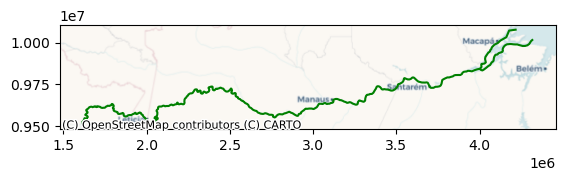

In [40]:
ax = amazon.plot(color='g')
ctx.add_basemap(ax=ax, crs=amazon.crs, source=ctx.providers.CartoDB.Voyager);

In [43]:
amazon['geometry_simple'] = amazon.simplify(tolerance=20000)

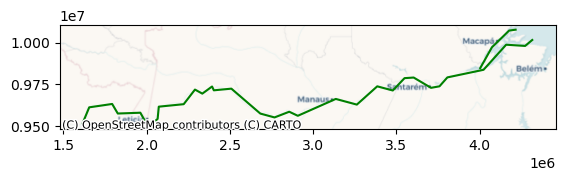

In [45]:
ax = amazon.set_geometry('geometry_simple').plot(color='g')
ctx.add_basemap(ax=ax, crs=amazon.crs, source=ctx.providers.CartoDB.Voyager);